In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [24]:
#import data
data = pd.read_csv('C:/Users/yangx/Desktop/CAISO/DELAMO_2_N001_2017DA.csv')
cl = data.Avg.values
cl.shape

(365,)

In [25]:
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.1677499 ],
       [0.22616207],
       [0.2746195 ],
       [0.23521185],
       [0.23570547],
       [0.20723982],
       [0.21744138],
       [0.19498149],
       [0.22352941],
       [0.19819005],
       [0.20255039],
       [0.23858494],
       [0.23208556],
       [0.20806253],
       [0.20148087],
       [0.19629782],
       [0.21596051],
       [0.20921432],
       [0.19613328],
       [0.20378445],
       [0.18222954],
       [0.20345537],
       [0.22097902],
       [0.21612505],
       [0.23677499],
       [0.22756067],
       [0.20765117],
       [0.17935006],
       [0.16445907],
       [0.20296174],
       [0.20904977],
       [0.18930481],
       [0.20723982],
       [0.19111477],
       [0.13920197],
       [0.15927602],
       [0.18140683],
       [0.17400247],
       [0.19917729],
       [0.19448787],
       [0.1842863 ],
       [0.13920197],
       [0.16972439],
       [0.2033731 ],
       [0.167174  ],
       [0.14265734],
       [0.12784862],
       [0.179

In [26]:
#Create a function to process the data into 7 day look back slices
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,7)

In [27]:
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

285
72
285
72


In [28]:
#Build the model
model = Sequential()
model.add(LSTM(64,input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),shuffle=False)

Train on 285 samples, validate on 72 samples
Epoch 1/300
285/285 [==============================] - 1s 3ms/step - loss: 0.0285 - val_loss: 0.0284
Epoch 2/300
285/285 [==============================] - 0s 223us/step - loss: 0.0088 - val_loss: 0.0132
Epoch 3/300
285/285 [==============================] - 0s 164us/step - loss: 0.0116 - val_loss: 0.0140
Epoch 4/300
285/285 [==============================] - 0s 185us/step - loss: 0.0100 - val_loss: 0.0173
Epoch 5/300
285/285 [==============================] - 0s 178us/step - loss: 0.0092 - val_loss: 0.0157
Epoch 6/300
285/285 [==============================] - 0s 175us/step - loss: 0.0088 - val_loss: 0.0142
Epoch 7/300
285/285 [==============================] - 0s 178us/step - loss: 0.0090 - val_loss: 0.0144
Epoch 8/300
285/285 [==============================] - 0s 185us/step - loss: 0.0089 - val_loss: 0.0147
Epoch 9/300
285/285 [==============================] - 0s 157us/step - loss: 0.0087 - val_loss: 0.0144
Epoch 10/300
285/285 [========

285/285 [==============================] - 0s 196us/step - loss: 0.0063 - val_loss: 0.0098
Epoch 80/300
285/285 [==============================] - 0s 171us/step - loss: 0.0063 - val_loss: 0.0096
Epoch 81/300
285/285 [==============================] - 0s 178us/step - loss: 0.0062 - val_loss: 0.0095
Epoch 82/300
285/285 [==============================] - 0s 164us/step - loss: 0.0062 - val_loss: 0.0094
Epoch 83/300
285/285 [==============================] - 0s 157us/step - loss: 0.0062 - val_loss: 0.0093
Epoch 84/300
285/285 [==============================] - 0s 161us/step - loss: 0.0061 - val_loss: 0.0092
Epoch 85/300
285/285 [==============================] - 0s 175us/step - loss: 0.0061 - val_loss: 0.0090
Epoch 86/300
285/285 [==============================] - 0s 171us/step - loss: 0.0061 - val_loss: 0.0089
Epoch 87/300
285/285 [==============================] - 0s 175us/step - loss: 0.0061 - val_loss: 0.0088
Epoch 88/300
285/285 [==============================] - 0s 171us/step - loss:

285/285 [==============================] - 0s 185us/step - loss: 0.0055 - val_loss: 0.0072
Epoch 158/300
285/285 [==============================] - 0s 171us/step - loss: 0.0055 - val_loss: 0.0072
Epoch 159/300
285/285 [==============================] - 0s 199us/step - loss: 0.0055 - val_loss: 0.0072
Epoch 160/300
285/285 [==============================] - 0s 175us/step - loss: 0.0055 - val_loss: 0.0072
Epoch 161/300
285/285 [==============================] - 0s 196us/step - loss: 0.0055 - val_loss: 0.0072
Epoch 162/300
285/285 [==============================] - 0s 192us/step - loss: 0.0055 - val_loss: 0.0072
Epoch 163/300
285/285 [==============================] - 0s 210us/step - loss: 0.0055 - val_loss: 0.0072
Epoch 164/300
285/285 [==============================] - 0s 196us/step - loss: 0.0055 - val_loss: 0.0072
Epoch 165/300
285/285 [==============================] - 0s 213us/step - loss: 0.0055 - val_loss: 0.0072
Epoch 166/300
285/285 [==============================] - 0s 207us/ste

285/285 [==============================] - 0s 189us/step - loss: 0.0052 - val_loss: 0.0074
Epoch 236/300
285/285 [==============================] - 0s 192us/step - loss: 0.0052 - val_loss: 0.0074
Epoch 237/300
285/285 [==============================] - 0s 175us/step - loss: 0.0052 - val_loss: 0.0074
Epoch 238/300
285/285 [==============================] - 0s 182us/step - loss: 0.0052 - val_loss: 0.0074
Epoch 239/300
285/285 [==============================] - 0s 189us/step - loss: 0.0052 - val_loss: 0.0074
Epoch 240/300
285/285 [==============================] - 0s 203us/step - loss: 0.0052 - val_loss: 0.0074
Epoch 241/300
285/285 [==============================] - 0s 203us/step - loss: 0.0051 - val_loss: 0.0074
Epoch 242/300
285/285 [==============================] - 0s 217us/step - loss: 0.0051 - val_loss: 0.0075
Epoch 243/300
285/285 [==============================] - 0s 203us/step - loss: 0.0051 - val_loss: 0.0075
Epoch 244/300
285/285 [==============================] - 0s 206us/ste

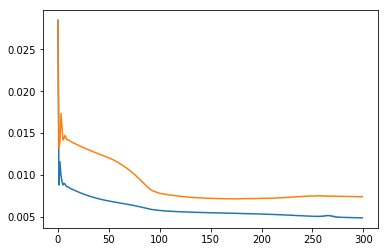

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

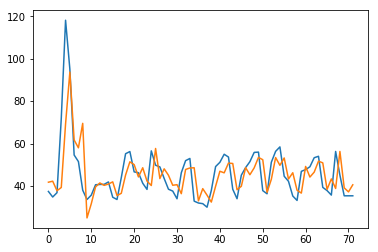

In [30]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
plt.plot(scl.inverse_transform(Xt))

In [32]:
#check test result at day 70
act = []
pred = []
#for i in range(250):
i=2
Xt = model.predict(X_test[i].reshape(1,7,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))

predicted:[[37.771393]], actual:[[36.85]]


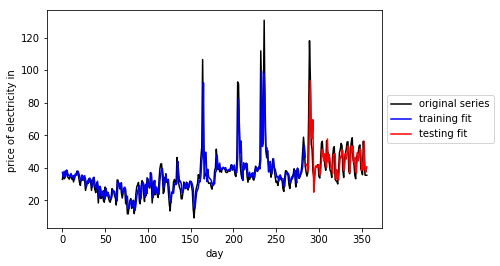

In [33]:
# plot original data
plt.plot(scl.inverse_transform(y.reshape(-1,1)), color='k')

Xtrain = model.predict(X_train)
Xtest = model.predict(X_test)

# plt.plot(scl.inverse_transform(y_test.reshape(-1,1)))
split_pt = int(X.shape[0]*0.80)  # window_size
plt.plot(np.arange(0,split_pt,1), scl.inverse_transform(Xtrain), color='b')
plt.plot(np.arange(split_pt,split_pt+len(Xtest),1), scl.inverse_transform(Xtest), color='r')

# pretty up graph
plt.xlabel('day')
plt.ylabel('price of electricity in ')
plt.legend(['original series','training fit','testing fit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()